In [ ]:
import pandas as pd
from pandas.plotting import scatter_matrix

import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [ ]:
file_path = '/content/drive/MyDrive/Colab/NU/CIVE7381/PS3'

In [ ]:
dF3 = pd.read_excel(file_path + '/PS3_data.xlsx')
dF3 = dF3.rename(columns={'Observation # (Zones)': 'Zone'})
tod_col = dF3.pop('TODU')
dF3['TODU'] = tod_col

dF3.head()

,Zone,ACO,AHS,MI,SRI,UI,TODU
0,1,0.59,3.26,21.01,28.32,60.10,3.18
1,2,0.57,3.13,21.61,20.89,65.71,3.89
2,3,0.61,3.02,12.57,25.99,63.19,3.98
3,4,0.61,3.14,17.61,28.52,66.24,4.16
4,5,0.63,3.75,35.32,27.18,58.36,3.60


In [ ]:
relevant_variables = ['ACO', 'AHS', 'MI', 'SRI', 'UI', 'TODU']
dF3[relevant_variables].describe()

,ACO,AHS,MI,SRI,UI,TODU
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,0.811754,3.185088,13.073158,49.560000,52.618772,5.373158
std,0.177655,0.389052,12.186774,15.844723,13.458622,1.325458
min,0.500000,1.830000,2.170000,20.890000,24.080000,3.020000
25%,0.670000,3.000000,6.820000,38.140000,44.800000,4.540000
50%,0.790000,3.190000,9.860000,49.370000,55.510000,5.100000
75%,0.920000,3.370000,15.080000,60.850000,61.090000,6.130000
max,1.320000,4.500000,62.530000,87.380000,83.660000,9.140000


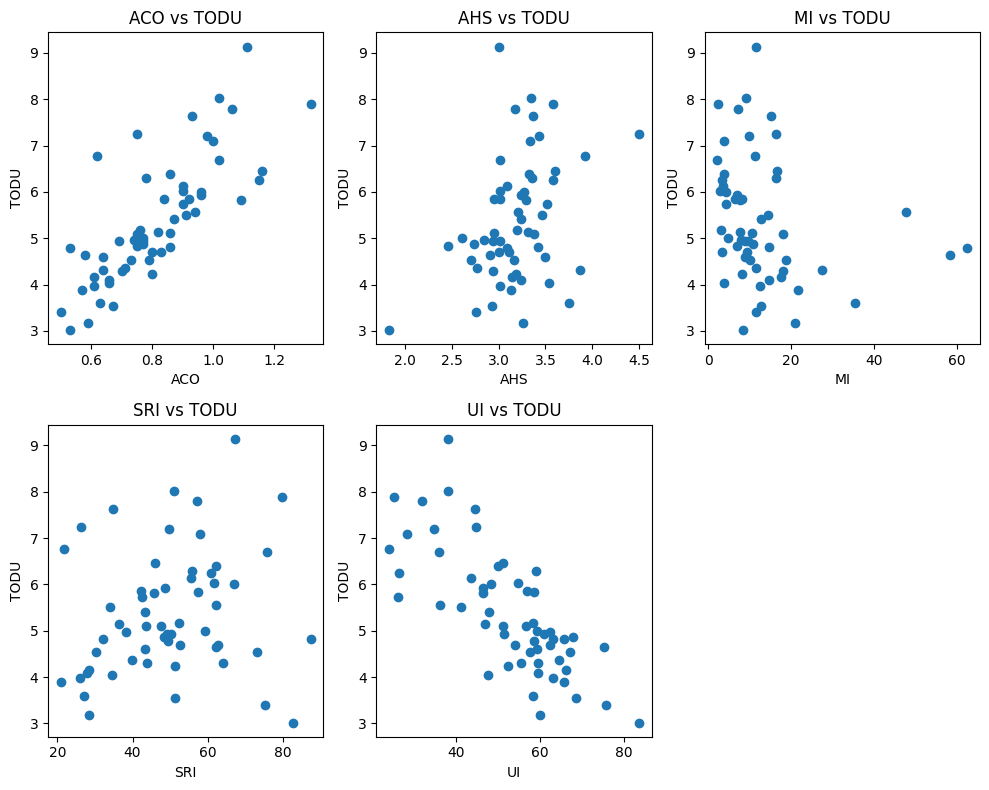

In [ ]:
# Scatterplot

# Variables to plot against 'TODU'
variables = ['ACO', 'AHS', 'MI', 'SRI', 'UI']

plt.figure(figsize=(10, 8))
for i, var in enumerate(variables):
    plt.subplot(2, 3, i + 1)  # 2 rows, 3 columns of subplots
    plt.scatter(dF3[var], dF3['TODU'], alpha=1)
    plt.title(f'{var} vs TODU')
    plt.xlabel(var)
    plt.ylabel('TODU')

plt.tight_layout()
plt.show()

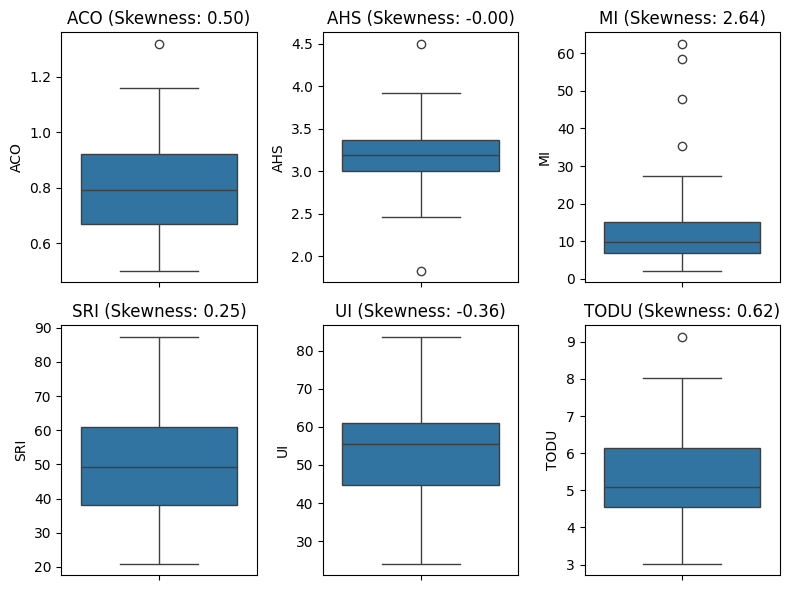

In [ ]:
# Boxplot

# Plotting grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 6))
axes = axes.flatten()

for i, var in enumerate(relevant_variables):
    # Boxplot
    sns.boxplot(data=dF3, y=var, ax=axes[i])

    # Calculate skewness
    skewness = dF3[var].skew()

    axes[i].set_title(f'{var} (Skewness: {skewness:.2f})')

plt.tight_layout()
plt.show()

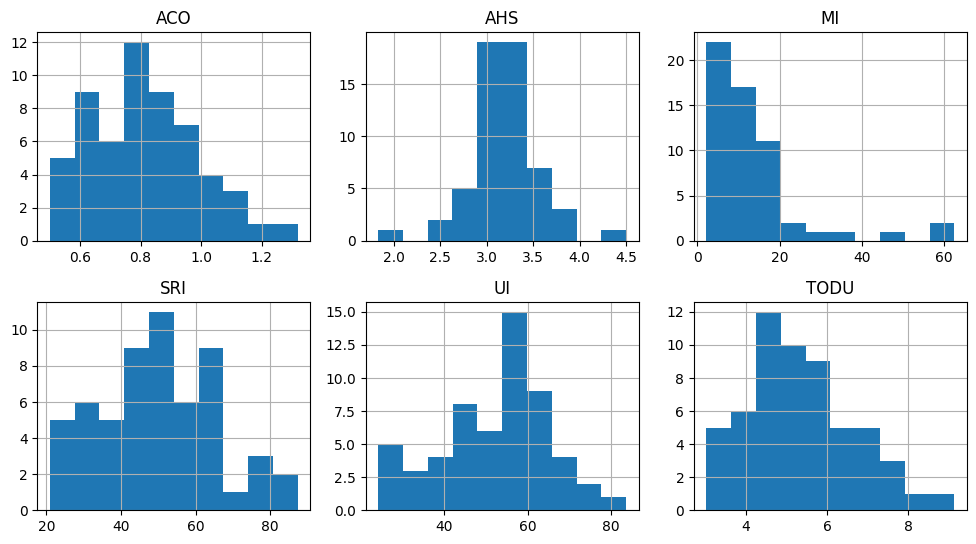

In [ ]:
# Histogram

dF3[relevant_variables].hist(figsize=(10,8), layout=(3,3))
plt.tight_layout()
plt.show()

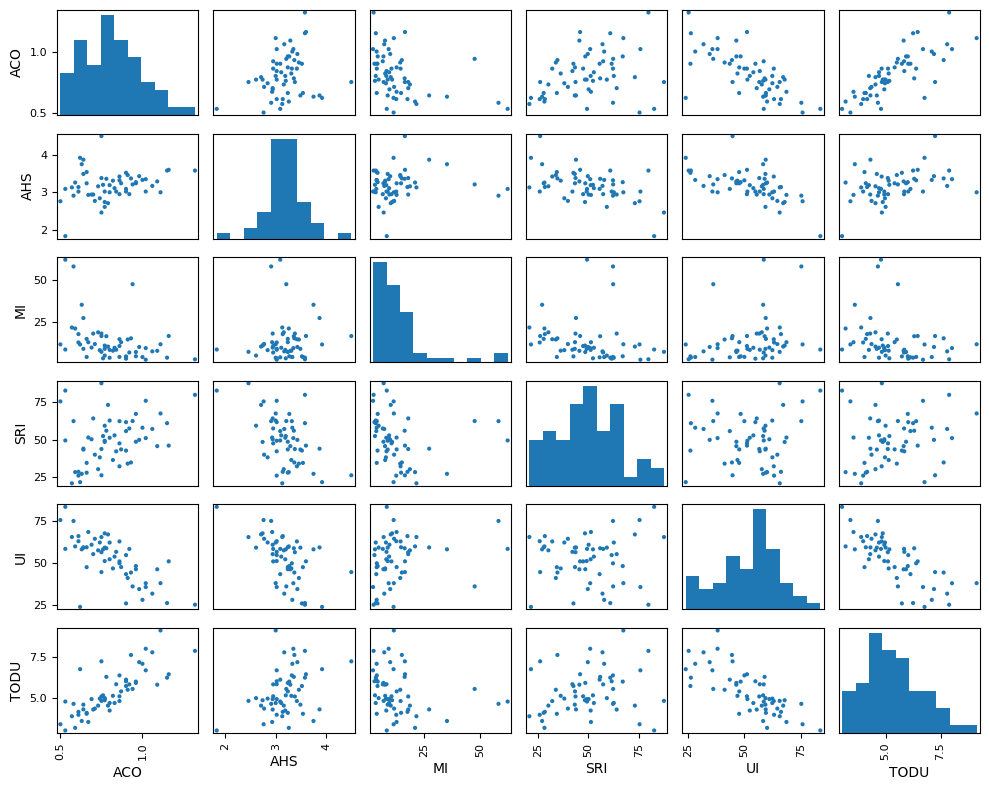

In [ ]:
# Scatter matrix
scatter_matrix(dF3[relevant_variables], figsize=(10, 8), alpha=1)
plt.tight_layout()
plt.show()

In [ ]:
# Correlation matrix
correlation_matrix = dF3[relevant_variables].corr()
correlation_matrix

,ACO,AHS,MI,SRI,UI,TODU
ACO,1.000000,0.236115,-0.396768,0.316662,-0.713194,0.785194
AHS,0.236115,1.000000,0.084910,-0.517667,-0.571897,0.374812
MI,-0.396768,0.084910,1.000000,-0.180489,0.248613,-0.246000
SRI,0.316662,-0.517667,-0.180489,1.000000,0.020830,0.186341
UI,-0.713194,-0.571897,0.248613,0.020830,1.000000,-0.756952
TODU,0.785194,0.374812,-0.246000,0.186341,-0.756952,1.000000


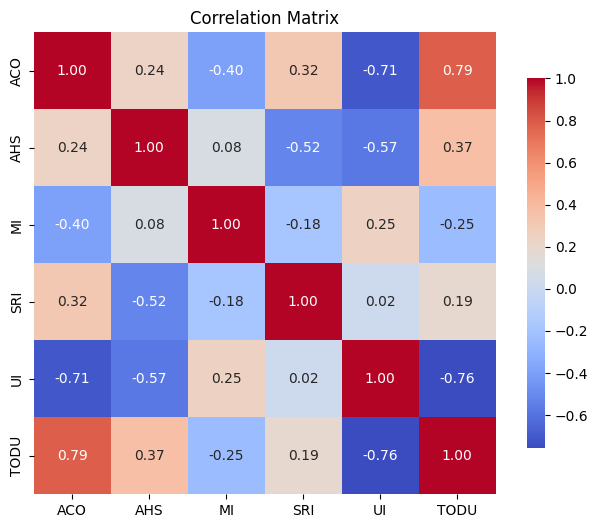

In [ ]:
# Heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True,
            fmt=".2f", cmap='coolwarm',
            square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

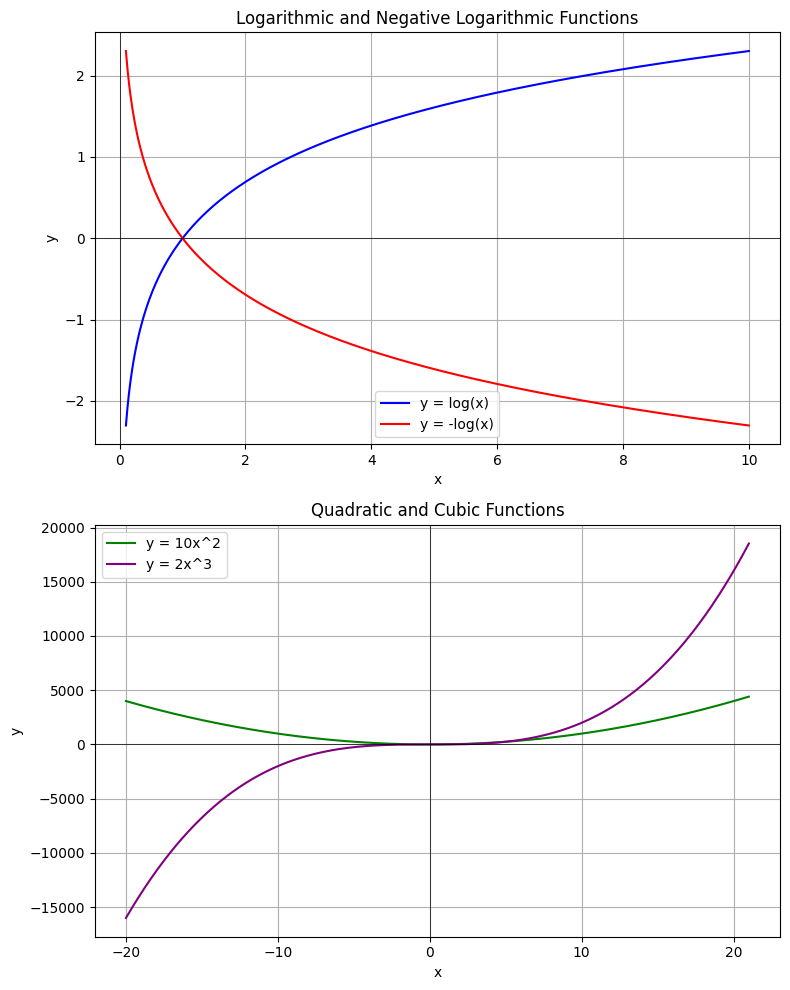

In [ ]:
# Define x values for all functions
x = np.linspace(0.1, 10, 400)
x2 = np.linspace(-20, 21, 400)

# Define the functions
y_log = np.log(x)
y_neg_log = -np.log(x)
y_quadratic = 10*x2**2
y_cubic = 2*x2**3

# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# Plot the log and negative log functions on the first subplot
axs[0].plot(x, y_log, label='y = log(x)', color='blue')
axs[0].plot(x, y_neg_log, label='y = -log(x)', color='red')
axs[0].set_title('Logarithmic and Negative Logarithmic Functions')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].axhline(0, color='black', linewidth=0.5)
axs[0].axvline(0, color='black', linewidth=0.5)
axs[0].grid(True)
axs[0].legend()

# Plot the quadratic and cubic functions on the second subplot
axs[1].plot(x2, y_quadratic, label='y = 10x^2', color='green')
axs[1].plot(x2, y_cubic, label='y = 2x^3', color='purple')
axs[1].set_title('Quadratic and Cubic Functions')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].axhline(0, color='black', linewidth=0.5)
axs[1].axvline(0, color='black', linewidth=0.5)
axs[1].grid(True)
axs[1].legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [ ]:
# Interaction terms
dF3['ACO_UI_interaction'] = dF3['ACO'] * dF3['UI']

# Predictor variables
X_ACO = dF3[['ACO']]
X_UI = dF3[['UI']]
X_both = dF3[['ACO', 'UI']]
X_inter = dF3[['ACO', 'UI', 'ACO_UI_interaction']]
X_all = dF3[['ACO', 'AHS', 'MI', 'SRI', 'UI']]

# Response variable
y = dF3['TODU']

# Add constant (intercept) to the models
X_ACO = sm.add_constant(X_ACO)
X_UI = sm.add_constant(X_UI)
X_both = sm.add_constant(X_both)
X_inter = sm.add_constant(X_inter)
X_all = sm.add_constant(X_all)

# Fit the models
model_ACO = sm.OLS(y, X_ACO).fit()
model_UI = sm.OLS(y, X_UI).fit()
model_both = sm.OLS(y, X_both).fit()
model_inter = sm.OLS(y, X_inter).fit()
model_all = sm.OLS(y, X_all).fit()

# Print the summaries
summary_ACO = model_ACO.summary()
summary_UI = model_UI.summary()
summary_both = model_both.summary()
summary_inter = model_inter.summary()
summary_all = model_all.summary()

print("Model 1: Using ACO\n", summary_ACO)
print("\nModel 2: Using UI\n", summary_UI)
print("\nModel 3: Using ACO and UI\n", summary_both)
print("\nModel 4: Using ACO, UI and ACO*UI\n", summary_inter)
print("\nModel 5: Using all the variables\n", summary_all)

Model 1: Using ACO
                             OLS Regression Results                            
Dep. Variable:                   TODU   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     88.43
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           4.82e-13
Time:                        00:46:42   Log-Likelihood:                -69.118
No. Observations:                  57   AIC:                             142.2
Df Residuals:                      55   BIC:                             146.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6177      0.517

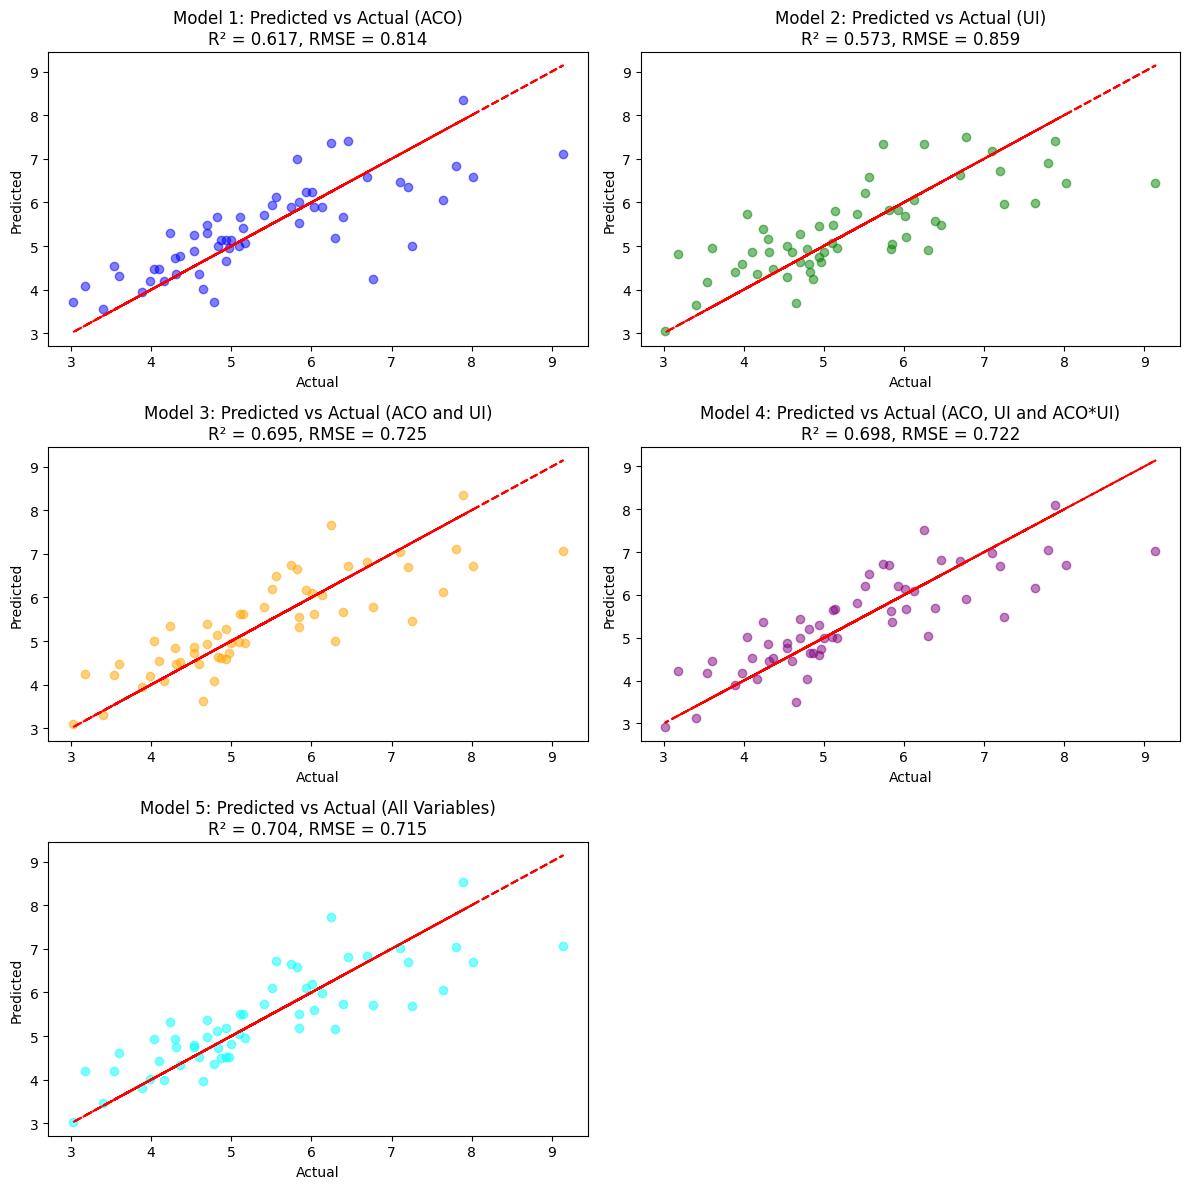

In [ ]:
# Get predicted values from each model
predicted_ACO = model_ACO.predict(X_ACO)
predicted_UI = model_UI.predict(X_UI)
predicted_both = model_both.predict(X_both)
predicted_inter = model_inter.predict(X_inter)
predicted_all = model_all.predict(X_all)
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate R-squared and RMSE
def calculate_metrics(y_true, y_pred):
    residuals = y_true - y_pred
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    r_squared = 1 - (ss_res / ss_tot)
    rmse = np.sqrt(np.mean(residuals**2))
    return r_squared, rmse

# Calculate metrics for each model
metrics_ACO = calculate_metrics(y, predicted_ACO)
metrics_UI = calculate_metrics(y, predicted_UI)
metrics_both = calculate_metrics(y, predicted_both)
metrics_inter = calculate_metrics(y, predicted_inter)
metrics_all = calculate_metrics(y, predicted_all)

# Create subplots for predicted vs actual
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
axs = axs.flatten()

# Model 1: ACO
axs[0].scatter(y, predicted_ACO, color='blue', alpha=0.5)
axs[0].plot(y, y, color='red', linestyle='--')  # 45-degree line
axs[0].set_title(f"Model 1: Predicted vs Actual (ACO)\nR² = {metrics_ACO[0]:.3f}, RMSE = {metrics_ACO[1]:.3f}")
axs[0].set_xlabel("Actual")
axs[0].set_ylabel("Predicted")

# Model 2: UI
axs[1].scatter(y, predicted_UI, color='green', alpha=0.5)
axs[1].plot(y, y, color='red', linestyle='--')
axs[1].set_title(f"Model 2: Predicted vs Actual (UI)\nR² = {metrics_UI[0]:.3f}, RMSE = {metrics_UI[1]:.3f}")
axs[1].set_xlabel("Actual")
axs[1].set_ylabel("Predicted")

# Model 3: ACO and UI
axs[2].scatter(y, predicted_both, color='orange', alpha=0.5)
axs[2].plot(y, y, color='red', linestyle='--')
axs[2].set_title(f"Model 3: Predicted vs Actual (ACO and UI)\nR² = {metrics_both[0]:.3f}, RMSE = {metrics_both[1]:.3f}")
axs[2].set_xlabel("Actual")
axs[2].set_ylabel("Predicted")

# Model 4: ACO, UI and ACO*UI
axs[3].scatter(y, predicted_inter, color='purple', alpha=0.5)
axs[3].plot(y, y, color='red', linestyle='--')
axs[3].set_title(f"Model 4: Predicted vs Actual (ACO, UI and ACO*UI)\nR² = {metrics_inter[0]:.3f}, RMSE = {metrics_inter[1]:.3f}")
axs[3].set_xlabel("Actual")
axs[3].set_ylabel("Predicted")

# Model 5: All Variables
axs[4].scatter(y, predicted_all, color='cyan', alpha=0.5)
axs[4].plot(y, y, color='red', linestyle='--')
axs[4].set_title(f"Model 5: Predicted vs Actual (All Variables)\nR² = {metrics_all[0]:.3f}, RMSE = {metrics_all[1]:.3f}")
axs[4].set_xlabel("Actual")
axs[4].set_ylabel("Predicted")

# Hide empty subplot (if you have 5 models in a 3x2 grid)
axs[5].axis('off')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()